In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

# Load the dataset
file_path = 'inputs/masterMerge.csv'
df = pd.read_csv(file_path)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Get the total number of instances in the dataset
total_instances = len(df)

# Define your features and the target variable
features = ['adrr', 'curuscn', 'scf', 'src', 'acominc',
                 'acox', 'at', 'am', 'ao', 'aoloch', 'aox', 'ap', 'at', 'caps', 'capx', 'cb',
                 'ch', 'che', 'clg', 'cogs', 'csho', 'cshrt', 'cstk', 'dd', 'dlc',
                 'dn', 'do', 'dt', 'ebit', 'ebitda', 'epspi', 'fca', 'ffo', 'gdwl',
                 'gp', 'ib', 'intan', 'invt', 'lt', 'lct', 'ni', 'niadj', 'np', 'pi', 'ppegt',
                 'pnrsho', 'ppent', 're', 'revt', 'sale', 'seq', 'tdc', 'teq', 'tstk', 'txt',
                 'wcap', 'naicsh', 'mkvalt', 'acchg', 'accrt', 'amc', 'ano', 'arce', 'cshi',
                 'depc', 'derhedgl']
target = 'IS_SPAC'

# Ensure the target column exists
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

# Fill NaN values in 'IS_SPAC' with 0 to indicate non-SPAC companies
df[target] = df[target].fillna(0)

# Convert the target column to an integer type
df[target] = df[target].astype(int)

# Convert categorical variables to numeric using one-hot encoding
df_clean = pd.get_dummies(df)

# Separate the features (X) and the target (y)
X = df_clean[features]
y = df_clean[target]

# Handle missing values in features by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X, y)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Evaluate the model using a confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision
precision = precision_score(y, y_pred)

# Calculate F1 score
f1 = f1_score(y, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate recall
recall = recall_score(y, y_pred)

print("\nMetrics:")
print("Precision:", precision)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Recall:", recall)

# Analyze feature importance (coefficients)
importance = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
importance.sort_values(by='Coefficient', ascending=False, inplace=True)

print("\nFeature Importance (Coefficients):")
print(importance)


c:\Users\ziggy\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\ziggy\AppData\Local\Temp\ipykernel_28232\3959192827.py:9: DtypeWarning: Columns (30,34,953,954,955,956,963,964,965,966,967) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Confusion Matrix:
[[27690     1]
 [   95     4]]

Metrics:
Precision: 0.8
F1 Score: 0.07692307692307693
Accuracy: 0.9965455199712127
Recall: 0.04040404040404041

Feature Importance (Coefficients):
   Feature  Coefficient
29  ebitda     0.001903
13    caps     0.001897
47      re     0.001600
37    invt     0.001483
54     txt     0.001259
..     ...          ...
55    wcap    -0.003231
32     ffo    -0.006613
18     clg    -0.009160
62    arce    -0.011057
64    depc    -0.014636

[66 rows x 2 columns]


c:\Users\ziggy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = 'inputs/master_filtered_data.csv'
df = pd.read_csv(file_path)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Get the total number of instances in the dataset
total_instances = len(df)

# Define your features and the target variable
features = ['adrr', 'curuscn', 'scf', 'src', 'acominc',
                 'acox', 'at', 'am', 'ao', 'aoloch', 'aox', 'ap', 'at', 'caps', 'capx', 'cb',
                 'ch', 'che', 'clg', 'cogs', 'csho', 'cshrt', 'cstk', 'dd', 'dlc',
                 'dn', 'do', 'dt', 'ebit', 'ebitda', 'epspi', 'fca', 'ffo', 'gdwl',
                 'gp', 'ib', 'intan', 'invt', 'lt', 'lct', 'ni', 'niadj', 'np', 'pi', 'ppegt',
                 'pnrsho', 'ppent', 're', 'revt', 'sale', 'seq', 'tdc', 'teq', 'tstk', 'txt',
                 'wcap', 'naicsh', 'mkvalt', 'acchg', 'accrt', 'amc', 'ano', 'arce', 'cshi',
                 'depc', 'derhedgl']
target = 'IS_SPAC'

# Ensure the target column exists
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

# Fill NaN values in 'IS_SPAC' with 0 to indicate non-SPAC companies
df[target] = df[target].fillna(0)

# Convert the target column to an integer type
df[target] = df[target].astype(int)

# Convert categorical variables to numeric using one-hot encoding
df_clean = pd.get_dummies(df)

# Separate the features (X) and the target (y)
X = df_clean[features]
y = df_clean[target]

# Handle missing values in features by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set using probability estimates
y_pred_proba = model.predict_proba(X_test)

# Define a range of thresholds
thresholds = np.linspace(0.15, 0.25, 10)

# Initialize variables to store the best F1 score and corresponding threshold
best_f1_score = 0
best_threshold = 0

# Find the threshold that maximizes the F1 score
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba[:, 1] >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

# Use the best threshold to make predictions
y_pred_best_threshold = (y_pred_proba[:, 1] >= best_threshold).astype(int)

# Evaluate the model using a confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_pred_best_threshold)
precision = precision_score(y_test, y_pred_best_threshold)
accuracy = accuracy_score(y_test, y_pred_best_threshold)
recall = recall_score(y_test, y_pred_best_threshold)

print("Best Threshold:", best_threshold)
print("Confusion Matrix:")
print(conf_matrix)
print("\nMetrics:")
print("Precision:", precision)
print("F1 Score:", best_f1_score)
print("Accuracy:", accuracy)
print("Recall:", recall)

Best Threshold: 0.22777777777777777
Confusion Matrix:
[[8288   20]
 [   6   23]]

Metrics:
Precision: 0.5348837209302325
F1 Score: 0.6388888888888888
Accuracy: 0.9968813721962336
Recall: 0.7931034482758621


c:\Users\ziggy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


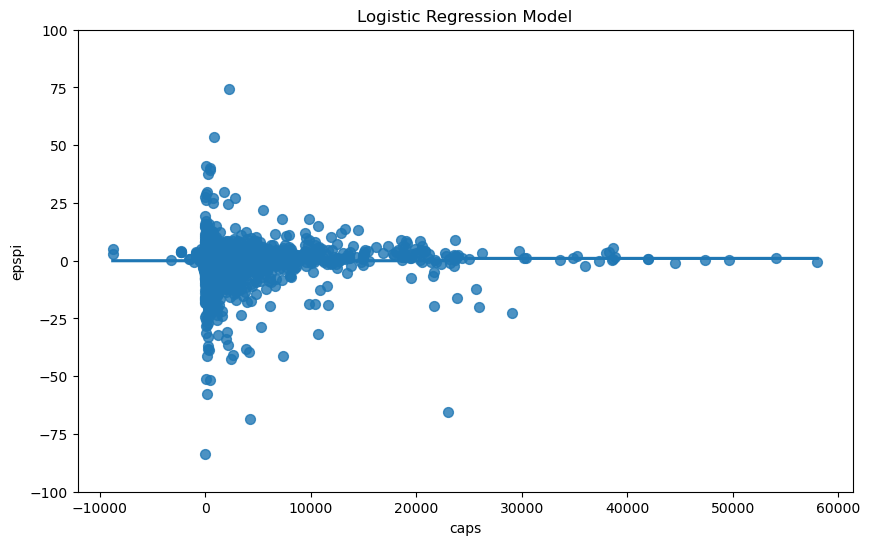

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

feature1 = 'caps'  # Change this to any feature you want
feature2 = 'epspi'  # Change this to any feature you want

# Plot the logistic regression model
plt.figure(figsize=(10, 6))
sns.regplot(x=feature1, y=feature2, data=df, logistic=True, scatter_kws={"s": 50}, ci=None)
plt.title('Logistic Regression Model')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.ylim(-100,100)
plt.show()

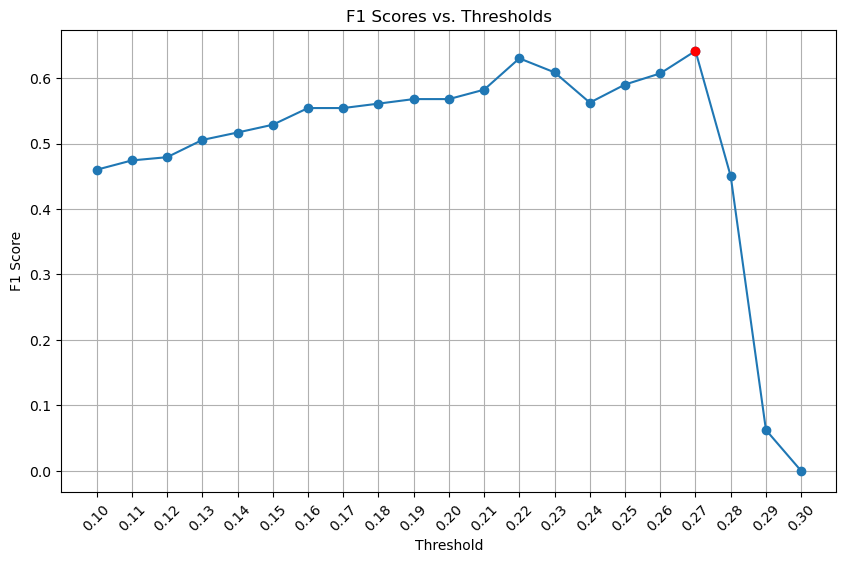

In [3]:
import matplotlib.pyplot as plt

# Define the thresholds and corresponding F1 scores
thresholds = np.linspace(0.1, 0.3, 21)
f1_scores = []

# Calculate F1 score for each threshold
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba[:, 1] >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted)
    f1_scores.append(f1)

# Plot F1 scores
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.title('F1 Scores vs. Thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.xticks(thresholds, rotation=45)
plt.grid(True)
max_index = f1_scores.index(max(f1_scores))
plt.scatter(thresholds[max_index], f1_scores[max_index], color='red', zorder=5)
plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, recall_score, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'inputs/masterMerge.csv'
df = pd.read_csv(file_path)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Define your features and the target variable
features = ['adrr', 'curuscn', 'scf', 'src', 'acominc',
            'acox', 'at', 'am', 'ao', 'aoloch', 'aox', 'ap', 'at', 'caps', 'capx', 'cb',
            'ch', 'che', 'clg', 'cogs', 'csho', 'cshrt', 'cstk', 'dd', 'dlc',
            'dn', 'do', 'dt', 'ebit', 'ebitda', 'epspi', 'fca', 'ffo', 'gdwl',
            'gp', 'ib', 'intan', 'invt', 'lt', 'lct', 'ni', 'niadj', 'np', 'pi', 'ppegt',
            'pnrsho', 'ppent', 're', 'revt', 'sale', 'seq', 'tdc', 'teq', 'tstk', 'txt',
            'wcap', 'naicsh', 'mkvalt', 'acchg', 'accrt', 'amc', 'ano', 'arce', 'cshi',
            'depc', 'derhedgl']
target = 'IS_SPAC'

# Ensure the target column exists
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

# Fill NaN values in 'IS_SPAC' with 0 to indicate non-SPAC companies
df[target] = df[target].fillna(0)

# Convert the target column to an integer type
df[target] = df[target].astype(int)

# Convert categorical variables to numeric using one-hot encoding
df_clean = pd.get_dummies(df)

# Separate the features (X) and the target (y)
X = df_clean[features]
y = df_clean[target]

# Handle missing values in features by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model with the best threshold
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set using probability estimates
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Plot the logistic regression curve with the scatter plot of predicted probabilities
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Logistic Regression')
plt.show()

C:\Users\ziggy\AppData\Local\Temp\ipykernel_28232\614336886.py:11: DtypeWarning: Columns (30,34,953,954,955,956,963,964,965,966,967) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
c:\Users\ziggy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 2 features, but LogisticRegression is expecting 66 features as input.